In [55]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# ** Depression Anxiety Stress Prediction**

In [56]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score, recall_score, f1_score,roc_auc_score,classification_report,mean_squared_error

In [57]:
data=pd.read_csv('data.csv')
data.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,...,1,1,1,12,1,10,2,1,2,NaN
1,4,2,8118,1,36,2890,2,35,4777,3,...,2,1,2,7,0,70,2,1,4,NaN
2,3,7,5784,1,33,4373,4,41,3242,1,...,2,1,1,4,3,60,1,1,3,NaN
3,2,23,5081,3,11,6837,2,37,5521,1,...,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,...,2,2,3,10,1,10,2,1,4,Psychology


In [58]:
data_1=data.copy()
data_1['major']=data_1['major'].replace(np.nan,'No Degree')
time = [i for i in data_1.iloc[:,0:126] if  'E' in i]
position = [i for i in data_1.iloc[:,0:126] if  'I' in i]
data_1=data_1.drop(position,axis=1)
data_1=data_1.drop(time,axis=1)
data_1=data_1.drop(data_1.iloc[:,43:47],axis=1)
data_2=data_1.copy()
data_2=data_2.drop(data_2.iloc[:,53:69],axis=1)
data_2=data_2.replace(to_replace=0,value=3)
data_2=data_2.rename(columns={'TIPI1':'Extraverted-enthusiastic','TIPI2':'Critical-quarrelsome',
                            'TIPI3':'Dependable-self_disciplined','TIPI4':'Anxious-easily upset',
                            'TIPI5':'Open to new experiences-complex','TIPI6':'Reserved-quiet',
                            'TIPI7':'Sympathetic-warm','TIPI8':'Disorganized-careless','TIPI9':'Calm-emotionally_stable',
                            'TIPI10':'Conventional-uncreative'})
print('Shape',data_2.shape)
print('Attributes',data_2.columns)

Shape (39775, 68)
Attributes Index(['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A',
       'Q11A', 'Q12A', 'Q13A', 'Q14A', 'Q15A', 'Q16A', 'Q17A', 'Q18A', 'Q19A',
       'Q20A', 'Q21A', 'Q22A', 'Q23A', 'Q24A', 'Q25A', 'Q26A', 'Q27A', 'Q28A',
       'Q29A', 'Q30A', 'Q31A', 'Q32A', 'Q33A', 'Q34A', 'Q35A', 'Q36A', 'Q37A',
       'Q38A', 'Q39A', 'Q40A', 'Q41A', 'Q42A', 'country',
       'Extraverted-enthusiastic', 'Critical-quarrelsome',
       'Dependable-self_disciplined', 'Anxious-easily upset',
       'Open to new experiences-complex', 'Reserved-quiet', 'Sympathetic-warm',
       'Disorganized-careless', 'Calm-emotionally_stable',
       'Conventional-uncreative', 'education', 'urban', 'gender', 'engnat',
       'age', 'screensize', 'uniquenetworklocation', 'hand', 'religion',
       'orientation', 'race', 'voted', 'married', 'familysize', 'major'],
      dtype='object')


In [59]:
data_2=data_2.replace([np.inf, -np.inf], np.nan)
data_2=data_2.dropna()

In [60]:
def condition(x):
    if x<=10:
        return 'Under 10'
    if  10<=x<=16:
        return ' Primary Children'
    if 17<=x<=21:
        return 'Secondary Children'
    if 21<=x<=35:
        return 'Adults'
    if 36<=x<=48:
        return 'Elder Adults'
    if x>=49:
        return 'Older People'

data_2['Age_Groups']=data_2['age'].apply(condition)
data_2.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major,Age_Groups
0,4,4,2,4,4,4,4,4,2,1,...,1,1,12,1,10,2,1,2,No Degree,Primary Children
1,4,1,2,3,4,4,3,4,3,2,...,1,2,7,3,70,2,1,4,No Degree,Primary Children
2,3,1,4,1,4,3,1,3,2,4,...,1,1,4,3,60,1,1,3,No Degree,Secondary Children
3,2,3,2,1,3,3,4,2,3,3,...,1,2,4,5,70,2,1,5,biology,Primary Children
4,2,2,3,4,4,2,4,4,4,3,...,2,3,10,1,10,2,1,4,Psychology,Secondary Children


In [61]:
new_data=data_2.iloc[:,42:]
data_3=data_2.filter(regex='Q\d{1,2}A')
data_3.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A
0,4,4,2,4,4,4,4,4,2,1,...,2,3,4,4,1,2,4,3,4,4
1,4,1,2,3,4,4,3,4,3,2,...,3,2,2,3,4,2,2,1,2,2
2,3,1,4,1,4,3,1,3,2,4,...,1,4,3,4,4,4,2,2,1,4
3,2,3,2,1,3,3,4,2,3,3,...,2,4,1,1,2,1,3,4,4,2
4,2,2,3,4,4,2,4,4,4,3,...,4,4,3,4,3,3,3,4,4,3


In [62]:
def sub(data_3):
    return data_3.subtract(1,axis=1)
data_3=sub(data_3) 
DASS_keys = {'Depression': [3, 5, 10, 13, 16, 17, 21, 24, 26, 31, 34, 37, 38, 42],
             'Anxiety': [2, 4, 7, 9, 15, 19, 20, 23, 25, 28, 30, 36, 40, 41],
             'Stress': [1, 6, 8, 11, 12, 14, 18, 22, 27, 29, 32, 33, 35, 39]}
Dep = []
for i in DASS_keys["Depression"]:
    Dep.append('Q'+str(i)+'A')
Stress = []
for i in DASS_keys["Stress"]:
    Stress.append('Q'+str(i)+'A')
Anx = []
for i in DASS_keys["Anxiety"]:
    Anx.append('Q'+str(i)+'A')
depression= data_3.filter(Dep)
stress = data_3.filter(Stress)
anxiety = data_3.filter(Anx)

In [63]:
def scores(source):
    col=list(source)
    source['Total_Count']=source[col].sum(axis=1)
    return source
depression=scores(depression)
stress=scores(stress)
anxiety=scores(anxiety)

In [64]:
Depression=pd.merge(depression,new_data,how='left',left_index=True,right_index=True)
Depression.head()

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,...,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major,Age_Groups
0,1,3,0,3,3,2,0,3,3,3,...,1,1,12,1,10,2,1,2,No Degree,Primary Children
1,1,3,1,3,2,3,1,1,2,1,...,1,2,7,3,70,2,1,4,No Degree,Primary Children
2,3,3,3,3,3,3,3,3,0,3,...,1,1,4,3,60,1,1,3,No Degree,Secondary Children
3,1,2,2,0,1,2,0,0,1,2,...,1,2,4,5,70,2,1,5,biology,Primary Children
4,2,3,2,3,2,3,2,1,3,2,...,2,3,10,1,10,2,1,4,Psychology,Secondary Children


In [65]:
Stress=pd.merge(stress,new_data,how='inner',left_index=True,right_index=True)
Stress.head()

,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,...,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major,Age_Groups
0,3,3,3,3,3,3,3,3,3,3,...,1,1,12,1,10,2,1,2,No Degree,Primary Children
1,3,3,3,1,1,3,1,2,2,2,...,1,2,7,3,70,2,1,4,No Degree,Primary Children
2,2,2,2,1,0,0,1,2,1,1,...,1,1,4,3,60,1,1,3,No Degree,Secondary Children
3,1,2,1,1,0,3,0,0,3,2,...,1,2,4,5,70,2,1,5,biology,Primary Children
4,1,1,3,1,3,3,3,2,1,1,...,2,3,10,1,10,2,1,4,Psychology,Secondary Children


In [66]:
Anxiety=pd.merge(anxiety,new_data,how='inner',left_index=True,right_index=True)
Anxiety.head()

,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,...,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major,Age_Groups
0,3,3,3,1,3,2,2,3,3,2,...,1,1,12,1,10,2,1,2,No Degree,Primary Children
1,0,2,2,2,2,0,0,0,1,3,...,1,2,7,3,70,2,1,4,No Degree,Primary Children
2,0,0,0,1,3,1,0,1,1,0,...,1,1,4,3,60,1,1,3,No Degree,Secondary Children
3,2,0,3,2,1,0,1,0,0,0,...,1,2,4,5,70,2,1,5,biology,Primary Children
4,1,3,3,3,3,3,3,3,3,3,...,2,3,10,1,10,2,1,4,Psychology,Secondary Children


In [67]:
def condition(x):
    if x<=9:
        return 'Normal'
    if  10<=x<=13:
        return 'Mild'
    if 14<=x<=20:
        return 'Moderate'
    if 21<=x<=27:
        return 'Severe'
    if x>28:
        return 'Extremely Severe'

Depression['Condition']=Depression['Total_Count'].apply(condition)
Depression.head()

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,...,hand,religion,orientation,race,voted,married,familysize,major,Age_Groups,Condition
0,1,3,0,3,3,2,0,3,3,3,...,1,12,1,10,2,1,2,No Degree,Primary Children,Severe
1,1,3,1,3,2,3,1,1,2,1,...,2,7,3,70,2,1,4,No Degree,Primary Children,Severe
2,3,3,3,3,3,3,3,3,0,3,...,1,4,3,60,1,1,3,No Degree,Secondary Children,Extremely Severe
3,1,2,2,0,1,2,0,0,1,2,...,2,4,5,70,2,1,5,biology,Primary Children,Moderate
4,2,3,2,3,2,3,2,1,3,2,...,3,10,1,10,2,1,4,Psychology,Secondary Children,Extremely Severe


In [68]:
def condition(x):
    if x<=14:
        return 'Normal'
    if  15<=x<=18:
        return 'Mild'
    if 19<=x<=25:
        return 'Moderate'
    if 26<=x<=33:
        return 'Severe'
    if x>=34:
        return 'Extremely Severe'

Stress['Condition']=Stress['Total_Count'].apply(condition)

Stress.head()

,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,...,hand,religion,orientation,race,voted,married,familysize,major,Age_Groups,Condition
0,3,3,3,3,3,3,3,3,3,3,...,1,12,1,10,2,1,2,No Degree,Primary Children,Extremely Severe
1,3,3,3,1,1,3,1,2,2,2,...,2,7,3,70,2,1,4,No Degree,Primary Children,Severe
2,2,2,2,1,0,0,1,2,1,1,...,1,4,3,60,1,1,3,No Degree,Secondary Children,Mild
3,1,2,1,1,0,3,0,0,3,2,...,2,4,5,70,2,1,5,biology,Primary Children,Mild
4,1,1,3,1,3,3,3,2,1,1,...,3,10,1,10,2,1,4,Psychology,Secondary Children,Severe


In [69]:
def condition(x):
    if x<=7:
        return 'Normal'
    if  8<=x<=9:
        return 'Mild'
    if 10<=x<=14:
        return 'Moderate'
    if 15<=x<=19:
        return 'Severe'
    if x>19:
        return 'Extremely Severe'

Anxiety['Condition']=Anxiety['Total_Count'].apply(condition)
Anxiety.head()

,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,...,hand,religion,orientation,race,voted,married,familysize,major,Age_Groups,Condition
0,3,3,3,1,3,2,2,3,3,2,...,1,12,1,10,2,1,2,No Degree,Primary Children,Extremely Severe
1,0,2,2,2,2,0,0,0,1,3,...,2,7,3,70,2,1,4,No Degree,Primary Children,Severe
2,0,0,0,1,3,1,0,1,1,0,...,1,4,3,60,1,1,3,No Degree,Secondary Children,Moderate
3,2,0,3,2,1,0,1,0,0,0,...,2,4,5,70,2,1,5,biology,Primary Children,Severe
4,1,3,3,3,3,3,3,3,3,3,...,3,10,1,10,2,1,4,Psychology,Secondary Children,Extremely Severe


In [70]:
def change_var(x):
    if x=='Primary Children':
        return 0
    elif x=='Secondary Children':
        return 1
    elif x=='Adults':
        return 2
    elif x=='Elder Adults':
        return 3
    elif x=='Older People':
        return 4
    

    
Depression['Age_Groups']=Depression['Age_Groups'].apply(change_var)
Stress['Age_Groups']=Stress['Age_Groups'].apply(change_var)
Anxiety['Age_Groups']=Anxiety['Age_Groups'].apply(change_var)

In [71]:
Depression=Depression.dropna()
Stress=Stress.dropna()
Anxiety=Anxiety.dropna()

In [72]:
Depression=Depression.drop(columns=['Total_Count','country','age'])
Stress=Stress.drop(columns=['Total_Count','country','age'])
Anxiety=Anxiety.drop(columns=['Total_Count','country','age'])

In [73]:
scaler=MinMaxScaler()
X=Depression[['Q3A', 'Q5A', 'Q10A', 'Q13A', 'Q16A', 'Q17A', 'Q21A', 'Q24A', 'Q26A',
       'Q31A', 'Q34A', 'Q37A', 'Q38A', 'Q42A',
       'Extraverted-enthusiastic', 'Critical-quarrelsome',
       'Dependable-self_disciplined', 'Anxious-easily upset',
        'Open to new experiences-complex', 'Reserved-quiet', 'Sympathetic-warm',
        'Disorganized-careless', 'Calm-emotionally_stable',
        'Conventional-uncreative', 'education', 'urban', 'gender', 'engnat',
        'screensize', 'uniquenetworklocation', 'hand', 'religion',
        'orientation', 'race', 'voted', 'married', 'familysize',
        'Age_Groups']]
y=Depression[['Condition']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [74]:
print('Training Set:',X_train.shape,y_train.shape)
print('Test Set:',X_test.shape,y_test.shape)

Training Set: (30645, 38) (30645, 1)
Test Set: (3406, 38) (3406, 1)


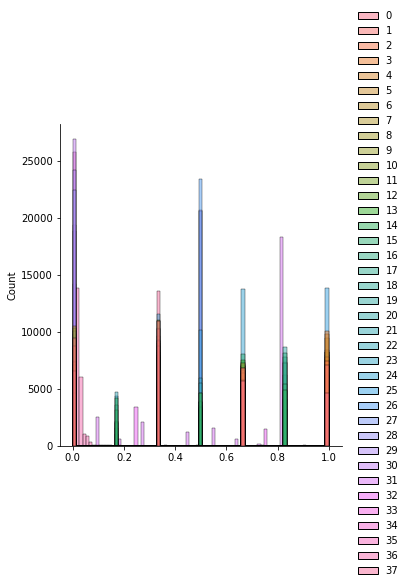

In [75]:
import seaborn as sns
sns.displot(X_train_scaled)

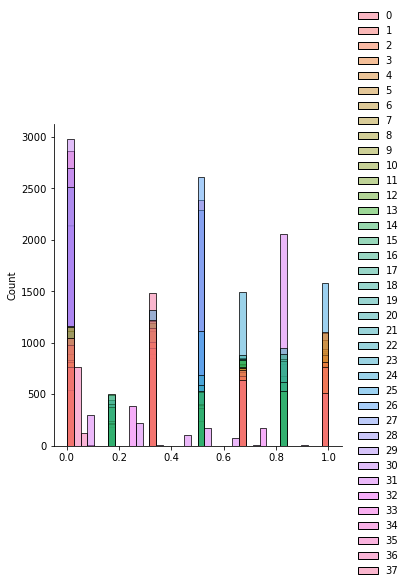

In [76]:
sns.displot(X_test_scaled)

In [77]:
import matplotlib.pyplot as plt

C:\Users\DELL-PC\AppData\Local\Temp\ipykernel_13252\1728321861.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RanFor=RandomForestClassifier(n_estimators=190,min_samples_split=3,min_samples_leaf=1,max_depth=160,max_features='auto').fit(X_train_scaled,y_train)


Accuracy: 0.927
F1_Score: 0.925
Recall_Score: 0.927
Precision_Score: 0.926


C:\Users\DELL-PC\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL-PC\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL-PC\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL-PC\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vec

Cross Validation Score: 0.929
                  precision    recall  f1-score   support

Extremely Severe     0.9836    0.9836    0.9836      1036
            Mild     0.8607    0.6789    0.7591       355
        Moderate     0.8563    0.9091    0.8819       616
          Normal     0.9425    0.9817    0.9617       818
          Severe     0.9161    0.9208    0.9185       581

        accuracy                         0.9272      3406
       macro avg     0.9118    0.8948    0.9009      3406
    weighted avg     0.9264    0.9272    0.9254      3406



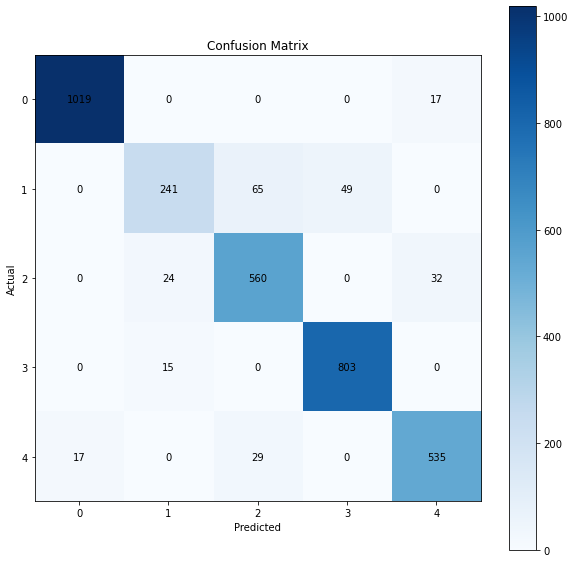

In [78]:
RanFor=RandomForestClassifier(n_estimators=190,min_samples_split=3,min_samples_leaf=1,max_depth=160,max_features='auto').fit(X_train_scaled,y_train)
Acc_ran=round(accuracy_score(y_test,RanFor.predict(X_test_scaled)),3)
f1_ran=round(f1_score(y_test,RanFor.predict(X_test_scaled),average='weighted'),3)
recall_ran=round(recall_score(y_test,RanFor.predict(X_test_scaled),average='weighted'),3)
precision_ran=round(precision_score(y_test,RanFor.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',Acc_ran)
print('F1_Score:',f1_ran)
print('Recall_Score:',recall_ran)
print('Precision_Score:',precision_ran)
print('Cross Validation Score:',round(np.mean(cross_val_score(RanFor, X_train_scaled, y_train, cv = 6)),3))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=RanFor.predict(X_test_scaled))
print(classification)
confusion = confusion_matrix(y_test, RanFor.predict(X_test_scaled))


fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(confusion, cmap=plt.cm.Blues)
for i in range(len(confusion)):
    for j in range(len(confusion[i])):
        text = ax.text(j, i, str(confusion[i, j]),
                       ha="center", va="center", color="black")

plt.colorbar(im)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy: 0.816
F1_Score: 0.816
Recall_Score: 0.816
Precision_Score: 0.817
Cross Validation Score: 0.799
                  precision    recall  f1-score   support

Extremely Severe     0.9331    0.9431    0.9381      1036
            Mild     0.5654    0.6085    0.5862       355
        Moderate     0.6997    0.7110    0.7053       616
          Normal     0.9177    0.9132    0.9154       818
          Severe     0.7449    0.6885    0.7156       581

        accuracy                         0.8156      3406
       macro avg     0.7722    0.7728    0.7721      3406
    weighted avg     0.8168    0.8156    0.8159      3406



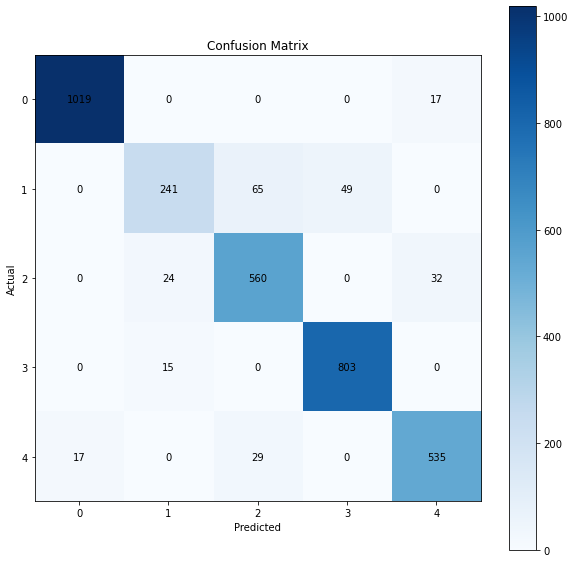

In [79]:
DT=DecisionTreeClassifier(criterion='entropy',splitter='best',min_samples_split=9,min_samples_leaf=2,max_depth=100).fit(X_train_scaled,y_train)
Acc_dt=round(accuracy_score(y_test,DT.predict(X_test_scaled)),3)
f1_dt=round(f1_score(y_test,DT.predict(X_test_scaled),average='weighted'),3)
recall_dt=round(recall_score(y_test,DT.predict(X_test_scaled),average='weighted'),3)
precision_dt=round(precision_score(y_test,DT.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',Acc_dt)
print('F1_Score:',f1_dt)
print('Recall_Score:',recall_dt)
print('Precision_Score:',precision_dt)
print('Cross Validation Score:',round(np.mean(cross_val_score(DT, X_train_scaled, y_train, cv = 6)),3))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=DT.predict(X_test_scaled))
print(classification)
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(confusion, cmap=plt.cm.Blues)
for i in range(len(confusion)):
    for j in range(len(confusion[i])):
        text = ax.text(j, i, str(confusion[i, j]),
                       ha="center", va="center", color="black")

plt.colorbar(im)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

C:\Users\DELL-PC\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.881
F1_Score: 0.885
Recall_Score: 0.881
Precision_Score: 0.897


C:\Users\DELL-PC\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL-PC\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL-PC\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL-PC\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

Cross Validation Score: 0.873
                  precision    recall  f1-score   support

Extremely Severe     1.0000    0.8929    0.9434      1036
            Mild     0.6477    0.8028    0.7170       355
        Moderate     0.8432    0.8555    0.8493       616
          Normal     0.9917    0.8741    0.9292       818
          Severe     0.7871    0.9415    0.8574       581

        accuracy                         0.8805      3406
       macro avg     0.8539    0.8734    0.8592      3406
    weighted avg     0.8966    0.8805    0.8847      3406



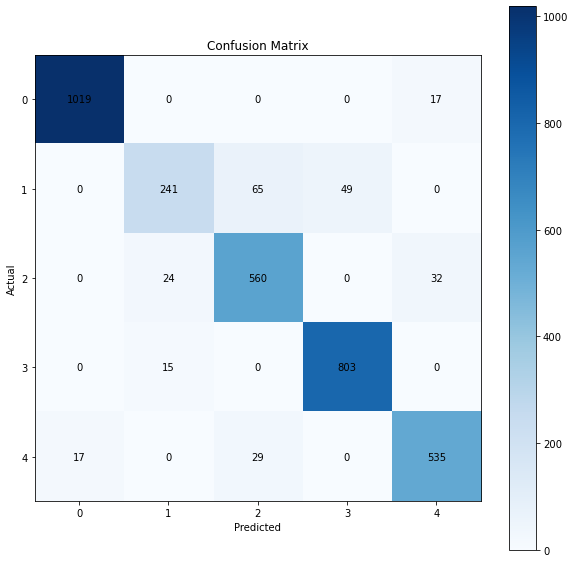

In [80]:
gb=GaussianNB().fit(X_train_scaled,y_train)
Acc_gb=round(accuracy_score(y_test,gb.predict(X_test_scaled)),3)
f1_gb=round(f1_score(y_test,gb.predict(X_test_scaled),average='weighted'),3)
recall_gb=round(recall_score(y_test,gb.predict(X_test_scaled),average='weighted'),3)
precision_gb=round(precision_score(y_test,gb.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',Acc_gb)
print('F1_Score:',f1_gb)
print('Recall_Score:',recall_gb)
print('Precision_Score:',precision_gb)
print('Cross Validation Score:',round(np.mean(cross_val_score(gb, X_train_scaled, y_train, cv = 6)),3))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=gb.predict(X_test_scaled))
print(classification)
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(confusion, cmap=plt.cm.Blues)
for i in range(len(confusion)):
    for j in range(len(confusion[i])):
        text = ax.text(j, i, str(confusion[i, j]),
                       ha="center", va="center", color="black")

plt.colorbar(im)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

C:\Users\DELL-PC\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.872
F1_Score: 0.866
Recall_Score: 0.872
Precision_Score: 0.874


C:\Users\DELL-PC\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\DELL-PC\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\DELL-PC\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\DELL-PC\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y t

Cross Validation Score: 0.872
                  precision    recall  f1-score   support

Extremely Severe     0.9524    0.9855    0.9687      1036
            Mild     0.7377    0.5070    0.6010       355
        Moderate     0.7312    0.9010    0.8073       616
          Normal     0.9009    0.9780    0.9379       818
          Severe     0.9323    0.7108    0.8066       581

        accuracy                         0.8717      3406
       macro avg     0.8509    0.8165    0.8243      3406
    weighted avg     0.8742    0.8717    0.8661      3406



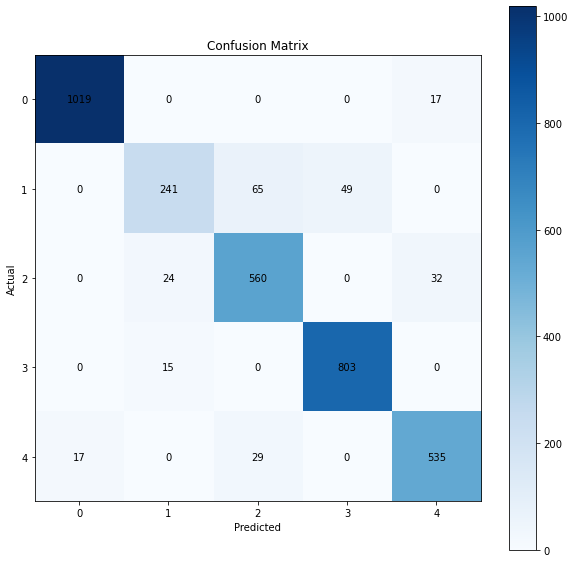

In [81]:
knn=KNeighborsClassifier(n_neighbors=15).fit(X_train_scaled,y_train)
Acc_knn=round(accuracy_score(y_test,knn.predict(X_test_scaled)),3)
f1_knn=round(f1_score(y_test,knn.predict(X_test_scaled),average='weighted'),3)
recall_knn=round(recall_score(y_test,knn.predict(X_test_scaled),average='weighted'),3)
precision_knn=round(precision_score(y_test,knn.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',Acc_knn)
print('F1_Score:',f1_knn)
print('Recall_Score:',recall_knn)
print('Precision_Score:',precision_knn)
print('Cross Validation Score:',round(np.mean(cross_val_score(knn, X_train_scaled, y_train, cv = 6)),3))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=knn.predict(X_test_scaled))
print(classification)
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(confusion, cmap=plt.cm.Blues)
for i in range(len(confusion)):
    for j in range(len(confusion[i])):
        text = ax.text(j, i, str(confusion[i, j]),
                       ha="center", va="center", color="black")

plt.colorbar(im)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

C:\Users\DELL-PC\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 1.0
F1_Score: 1.0
Recall_Score: 1.0
Precision_Score: 1.0


C:\Users\DELL-PC\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL-PC\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL-PC\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL-PC\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

Cross Validation Score: 1.0
                  precision    recall  f1-score   support

Extremely Severe     1.0000    1.0000    1.0000      1036
            Mild     1.0000    1.0000    1.0000       355
        Moderate     1.0000    1.0000    1.0000       616
          Normal     1.0000    1.0000    1.0000       818
          Severe     1.0000    1.0000    1.0000       581

        accuracy                         1.0000      3406
       macro avg     1.0000    1.0000    1.0000      3406
    weighted avg     1.0000    1.0000    1.0000      3406



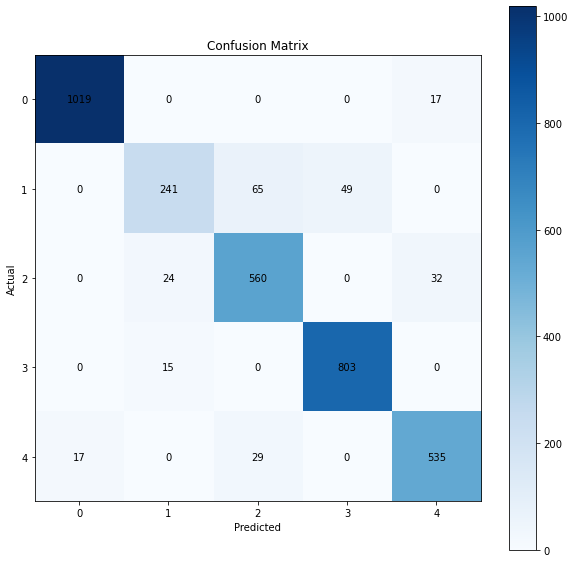

In [82]:
from sklearn.svm import SVC
svm=SVC(C=100,gamma=0.1,kernel='rbf').fit(X_train_scaled,y_train)
Acc_svm=round(accuracy_score(y_test,svm.predict(X_test_scaled)),3)
f1_svm=round(f1_score(y_test,svm.predict(X_test_scaled),average='weighted'),3)
recall_svm=round(recall_score(y_test,svm.predict(X_test_scaled),average='weighted'),3)
precision_svm=round(precision_score(y_test,svm.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',Acc_svm)
print('F1_Score:',f1_svm)
print('Recall_Score:',recall_svm)
print('Precision_Score:',precision_svm)
print('Cross Validation Score:',round(np.mean(cross_val_score(svm, X_train_scaled, y_train, cv = 6)),3))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=svm.predict(X_test_scaled))
print(classification)
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(confusion, cmap=plt.cm.Blues)
for i in range(len(confusion)):
    for j in range(len(confusion[i])):
        text = ax.text(j, i, str(confusion[i, j]),
                       ha="center", va="center", color="black")

plt.colorbar(im)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [83]:
Result={
                  'Model':['Random-Forest','Decision-Tree','GaussianNB','Nearest-Neighbors','SVM'],
                  'Accuracy(%)':[Acc_ran*100,Acc_dt*100,Acc_gb*100,Acc_knn*100,Acc_svm*100],
                  'F1_Score(%)':[f1_ran*100,f1_dt*100,f1_gb*100,f1_knn*100,f1_svm*100],
                  'Precision(%)':[precision_ran*100,precision_dt*100,precision_gb*100,precision_knn*100,precision_svm*100],
                  'Recall(%)':[recall_ran*100,recall_dt*100,recall_gb*100,recall_knn*100,recall_svm*100],
                    }
Result_Depression=pd.DataFrame(Result)

In [84]:
scaler=MinMaxScaler()
X=Stress[['Q1A', 'Q6A', 'Q8A', 'Q11A', 'Q12A', 'Q14A', 'Q18A', 'Q22A', 'Q27A',
       'Q29A', 'Q32A', 'Q33A', 'Q35A', 'Q39A',
       'Extraverted-enthusiastic', 'Critical-quarrelsome',
       'Dependable-self_disciplined', 'Anxious-easily upset',
        'Open to new experiences-complex', 'Reserved-quiet', 'Sympathetic-warm',
        'Disorganized-careless', 'Calm-emotionally_stable',
        'Conventional-uncreative', 'education', 'urban', 'gender', 'engnat',
        'screensize', 'uniquenetworklocation', 'hand', 'religion',
        'orientation', 'race', 'voted', 'married', 'familysize',
        'Age_Groups']]
y=Stress[['Condition']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\Users\DELL-PC\AppData\Local\Temp\ipykernel_13252\4252495271.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ran=RandomForestClassifier().fit(X_train_scaled,y_train)


Accuracy: 0.887
F1_Score: 0.884
Recall_Score: 0.887
Precision_Score: 0.888


C:\Users\DELL-PC\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL-PC\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL-PC\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL-PC\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vec

Cross Validation Score: 0.889693827231858
                  precision    recall  f1-score   support

Extremely Severe     0.9663    0.8951    0.9293       448
            Mild     0.8399    0.6083    0.7056       457
        Moderate     0.7975    0.8988    0.8451       771
          Normal     0.9520    0.9772    0.9644      1095
          Severe     0.8694    0.9086    0.8886       711

        accuracy                         0.8868      3482
       macro avg     0.8850    0.8576    0.8666      3482
    weighted avg     0.8880    0.8868    0.8840      3482



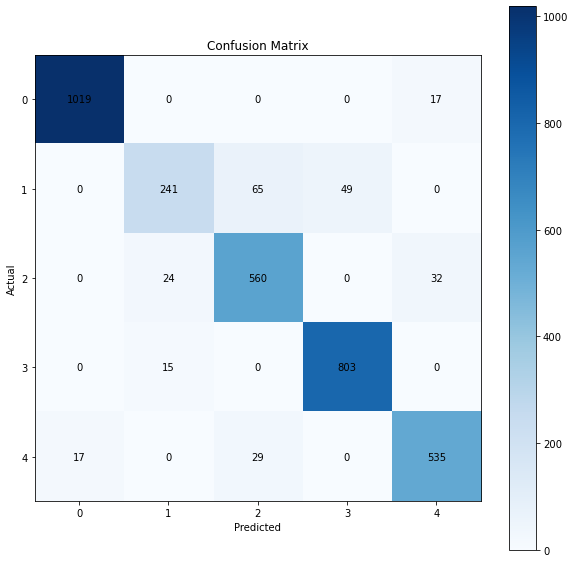

In [85]:
ran=RandomForestClassifier().fit(X_train_scaled,y_train)
acc_ran=round(accuracy_score(y_test,ran.predict(X_test_scaled)),3)
F1_ran=round(f1_score(y_test,ran.predict(X_test_scaled),average='weighted'),3)
prec_ran=round(precision_score(y_test,ran.predict(X_test_scaled),average='weighted'),3)
rec_ran=round(recall_score(y_test,ran.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',acc_ran)
print('F1_Score:',F1_ran)
print('Recall_Score:',rec_ran)
print('Precision_Score:',prec_ran)
print('Cross Validation Score:',(np.mean(cross_val_score(ran, X_train_scaled, y_train, cv = 6))))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=ran.predict(X_test_scaled))
print(classification)
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(confusion, cmap=plt.cm.Blues)
for i in range(len(confusion)):
    for j in range(len(confusion[i])):
        text = ax.text(j, i, str(confusion[i, j]),
                       ha="center", va="center", color="black")

plt.colorbar(im)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy: 0.748
F1_Score: 0.748
Recall_Score: 0.748
Precision_Score: 0.748
Cross Validation Score: 0.7559605571612916
                  precision    recall  f1-score   support

Extremely Severe     0.8468    0.8393    0.8430       448
            Mild     0.4883    0.5011    0.4946       457
        Moderate     0.6760    0.6576    0.6667       771
          Normal     0.8845    0.8813    0.8829      1095
          Severe     0.7225    0.7398    0.7311       711

        accuracy                         0.7476      3482
       macro avg     0.7236    0.7238    0.7237      3482
    weighted avg     0.7484    0.7476    0.7479      3482



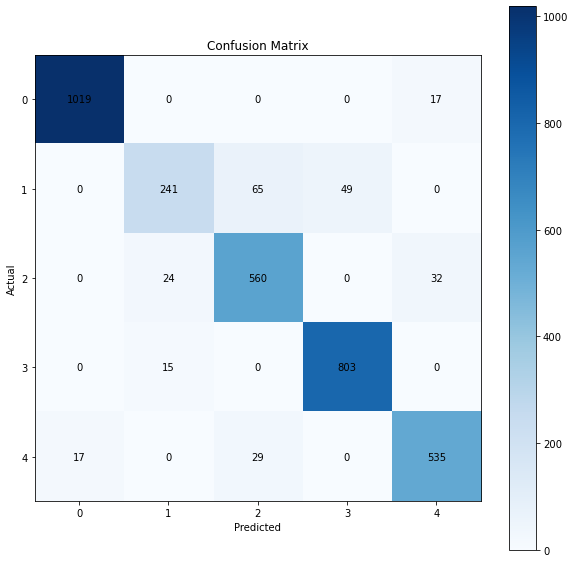

In [86]:
dt=DecisionTreeClassifier(criterion= 'entropy',max_depth= 80, min_samples_leaf= 9, min_samples_split=9).fit(X_train_scaled,y_train)
acc_dt=round(accuracy_score(y_test,dt.predict(X_test_scaled)),3)
F1_dt=round(f1_score(y_test,dt.predict(X_test_scaled),average='weighted'),3)
prec_dt=round(precision_score(y_test,dt.predict(X_test_scaled),average='weighted'),3)
rec_dt=round(recall_score(y_test,dt.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',acc_dt)
print('F1_Score:',F1_dt)
print('Recall_Score:',rec_dt)
print('Precision_Score:',prec_dt)
print('Cross Validation Score:',(np.mean(cross_val_score(dt, X_train_scaled, y_train, cv = 6))))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=dt.predict(X_test_scaled))
print(classification)
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(confusion, cmap=plt.cm.Blues)
for i in range(len(confusion)):
    for j in range(len(confusion[i])):
        text = ax.text(j, i, str(confusion[i, j]),
                       ha="center", va="center", color="black")

plt.colorbar(im)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

C:\Users\DELL-PC\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.858
F1_Score: 0.862
Recall_Score: 0.858
Precision_Score: 0.874


C:\Users\DELL-PC\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL-PC\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL-PC\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL-PC\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

Cross Validation Score: 0.8504675801182279
                  precision    recall  f1-score   support

Extremely Severe     0.9646    0.8527    0.9052       448
            Mild     0.6298    0.7965    0.7034       457
        Moderate     0.8234    0.8768    0.8492       771
          Normal     0.9873    0.8502    0.9136      1095
          Severe     0.8535    0.8931    0.8729       711

        accuracy                         0.8581      3482
       macro avg     0.8517    0.8539    0.8489      3482
    weighted avg     0.8738    0.8581    0.8624      3482



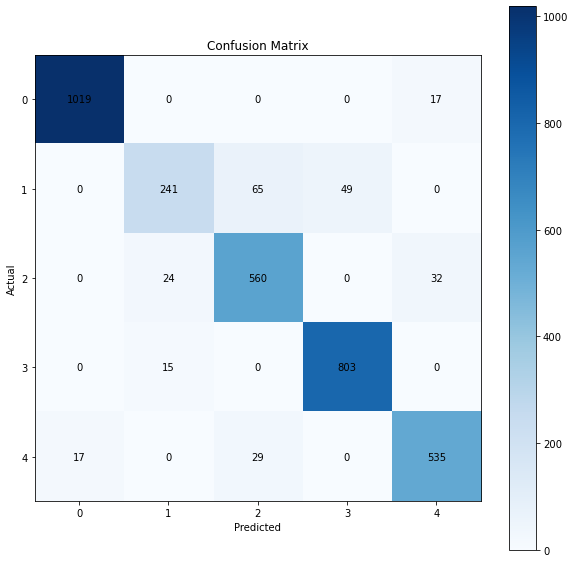

In [87]:
Gb=GaussianNB().fit(X_train_scaled,y_train)
acc_gb=round(accuracy_score(y_test,Gb.predict(X_test_scaled)),3)
F1_gb=round(f1_score(y_test,Gb.predict(X_test_scaled),average='weighted'),3)
prec_gb=round(precision_score(y_test,Gb.predict(X_test_scaled),average='weighted'),3)
rec_gb=round(recall_score(y_test,Gb.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',acc_gb)
print('F1_Score:',F1_gb)
print('Recall_Score:',rec_gb)
print('Precision_Score:',prec_gb)
print('Cross Validation Score:',(np.mean(cross_val_score(Gb, X_train_scaled, y_train, cv = 6))))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=Gb.predict(X_test_scaled))
print(classification)
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(confusion, cmap=plt.cm.Blues)
for i in range(len(confusion)):
    for j in range(len(confusion[i])):
        text = ax.text(j, i, str(confusion[i, j]),
                       ha="center", va="center", color="black")

plt.colorbar(im)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

C:\Users\DELL-PC\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.854
F1_Score: 0.851
Recall_Score: 0.854
Precision_Score: 0.85


C:\Users\DELL-PC\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\DELL-PC\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\DELL-PC\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\DELL-PC\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y t

Cross Validation Score: 0.845967333603237
                  precision    recall  f1-score   support

Extremely Severe     0.9023    0.9487    0.9249       448
            Mild     0.6823    0.6061    0.6419       457
        Moderate     0.8203    0.8171    0.8187       771
          Normal     0.8954    0.9616    0.9273      1095
          Severe     0.8880    0.8256    0.8557       711

        accuracy                         0.8535      3482
       macro avg     0.8377    0.8318    0.8337      3482
    weighted avg     0.8502    0.8535    0.8509      3482



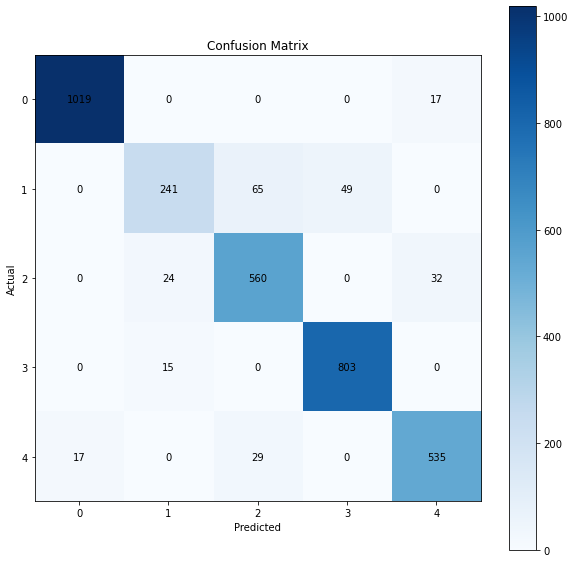

In [88]:
Knn=KNeighborsClassifier(n_neighbors=15).fit(X_train_scaled,y_train)
acc_knn=round(accuracy_score(y_test,Knn.predict(X_test_scaled)),3)
F1_knn=round(f1_score(y_test,Knn.predict(X_test_scaled),average='weighted'),3)
prec_knn=round(precision_score(y_test,Knn.predict(X_test_scaled),average='weighted'),3)
rec_knn=round(recall_score(y_test,Knn.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',acc_knn)
print('F1_Score:',F1_knn)
print('Recall_Score:',rec_knn)
print('Precision_Score:',prec_knn)
print('Cross Validation Score:',(np.mean(cross_val_score(Knn, X_train_scaled, y_train, cv = 6))))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=Knn.predict(X_test_scaled))
print(classification)
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(confusion, cmap=plt.cm.Blues)
for i in range(len(confusion)):
    for j in range(len(confusion[i])):
        text = ax.text(j, i, str(confusion[i, j]),
                       ha="center", va="center", color="black")

plt.colorbar(im)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

C:\Users\DELL-PC\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.996
F1_Score: 0.996
Recall_Score: 0.996
Precision_Score: 0.996


C:\Users\DELL-PC\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL-PC\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL-PC\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL-PC\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

Cross Validation Score: 0.9976381301265135
                  precision    recall  f1-score   support

Extremely Severe     1.0000    1.0000    1.0000       448
            Mild     0.9912    0.9912    0.9912       457
        Moderate     0.9948    0.9896    0.9922       771
          Normal     0.9982    1.0000    0.9991      1095
          Severe     0.9944    0.9972    0.9958       711

        accuracy                         0.9960      3482
       macro avg     0.9957    0.9956    0.9957      3482
    weighted avg     0.9960    0.9960    0.9960      3482



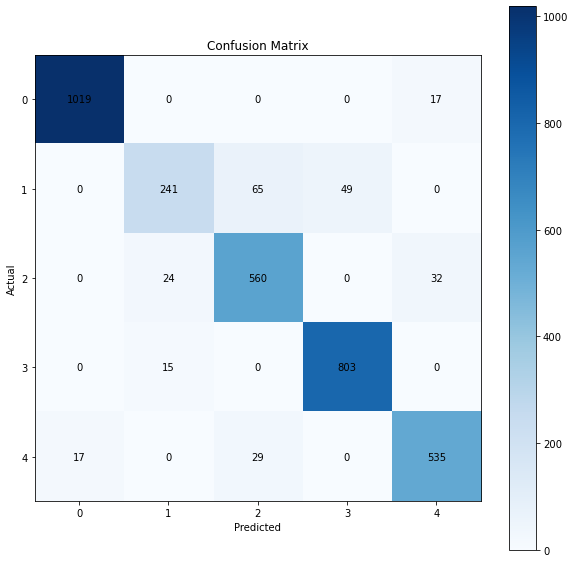

In [89]:
Svm=SVC(C=10, gamma=0.01, kernel='sigmoid').fit(X_train_scaled,y_train)
acc_svm=round(accuracy_score(y_test,Svm.predict(X_test_scaled)),3)
F1_svm=round(f1_score(y_test,Svm.predict(X_test_scaled),average='weighted'),3)
prec_svm=round(precision_score(y_test,Svm.predict(X_test_scaled),average='weighted'),3)
rec_svm=round(recall_score(y_test,Svm.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',acc_svm)
print('F1_Score:',F1_svm)
print('Recall_Score:',rec_svm)
print('Precision_Score:',prec_svm)
print('Cross Validation Score:',(np.mean(cross_val_score(Svm, X_train_scaled, y_train, cv = 6))))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=Svm.predict(X_test_scaled))
print(classification)
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(confusion, cmap=plt.cm.Blues)
for i in range(len(confusion)):
    for j in range(len(confusion[i])):
        text = ax.text(j, i, str(confusion[i, j]),
                       ha="center", va="center", color="black")

plt.colorbar(im)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [90]:
Result_1={
                  'Model':['Random-Forest','Decision-Tree','GaussianNB','Nearest-Neighbors','SVM'],
                  'Accuracy(%)':[acc_ran*100,acc_dt*100,acc_gb*100,acc_knn*100,acc_svm*100],
                  'F1_Score(%)':[F1_ran*100,F1_dt*100,F1_gb*100,F1_knn*100,F1_svm*100],
                  'Precision(%)':[prec_ran*100,prec_dt*100,prec_gb*100,prec_knn*100,prec_svm*100],
                  'Recall(%)':[rec_ran*100,rec_dt*100,rec_gb*100,rec_knn*100,rec_svm*100]
                    }
Result_Stress=pd.DataFrame(Result_1)

In [91]:
scaler=MinMaxScaler()
X=Anxiety[['Q2A', 'Q4A', 'Q7A', 'Q9A', 'Q15A', 'Q19A', 'Q20A', 'Q23A', 'Q25A',
       'Q28A', 'Q30A', 'Q36A', 'Q40A', 'Q41A',
       'Extraverted-enthusiastic', 'Critical-quarrelsome',
       'Dependable-self_disciplined', 'Anxious-easily upset',
        'Open to new experiences-complex', 'Reserved-quiet', 'Sympathetic-warm',
        'Disorganized-careless', 'Calm-emotionally_stable',
        'Conventional-uncreative', 'education', 'urban', 'gender', 'engnat',
        'screensize', 'uniquenetworklocation', 'hand', 'religion',
        'orientation', 'race', 'voted', 'married', 'familysize',
        'Age_Groups']]
y=Anxiety[['Condition']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\Users\DELL-PC\AppData\Local\Temp\ipykernel_13252\2396259398.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rand=RandomForestClassifier(criterion='entropy').fit(X_train_scaled,y_train)


Accuracy: 0.852
F1_Score: 0.827
Recall_Score: 0.84
Precision_Score: 0.852


C:\Users\DELL-PC\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL-PC\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL-PC\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL-PC\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vec

Cross Validation Score: 0.853563499329875
                  precision    recall  f1-score   support

Extremely Severe     0.9245    0.9707    0.9471      1161
            Mild     0.6389    0.0895    0.1570       257
        Moderate     0.7294    0.8942    0.8035       624
          Normal     0.8755    0.9889    0.9288       903
          Severe     0.8235    0.6778    0.7436       537

        accuracy                         0.8515      3482
       macro avg     0.7984    0.7242    0.7160      3482
    weighted avg     0.8402    0.8515    0.8269      3482



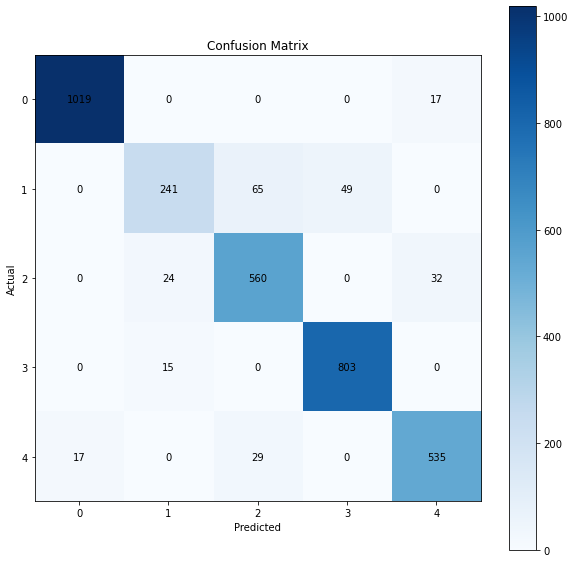

In [92]:
rand=RandomForestClassifier(criterion='entropy').fit(X_train_scaled,y_train)
accu_ran=round(accuracy_score(y_test,rand.predict(X_test_scaled)),3)
f1_score_ran=round(f1_score(y_test,rand.predict(X_test_scaled),average='weighted'),3)
Precision_ran=round(precision_score(y_test,rand.predict(X_test_scaled),average='weighted'),3)
Recall_ran=round(recall_score(y_test,rand.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',accu_ran)
print('F1_Score:',f1_score_ran)
print('Recall_Score:',Precision_ran)
print('Precision_Score:',Recall_ran)
print('Cross Validation Score:',(np.mean(cross_val_score(rand, X_train_scaled, y_train, cv = 6))))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=rand.predict(X_test_scaled))
print(classification)
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(confusion, cmap=plt.cm.Blues)
for i in range(len(confusion)):
    for j in range(len(confusion[i])):
        text = ax.text(j, i, str(confusion[i, j]),
                       ha="center", va="center", color="black")

plt.colorbar(im)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy: 0.734
F1_Score: 0.733
Recall_Score: 0.733
Precision_Score: 0.734
Cross Validation Score: 0.7374484281420233
                  precision    recall  f1-score   support

Extremely Severe     0.8638    0.8742    0.8690      1161
            Mild     0.3926    0.3696    0.3808       257
        Moderate     0.5873    0.6362    0.6108       624
          Normal     0.8914    0.8726    0.8819       903
          Severe     0.5168    0.4860    0.5010       537

        accuracy                         0.7341      3482
       macro avg     0.6504    0.6478    0.6487      3482
    weighted avg     0.7331    0.7341    0.7333      3482



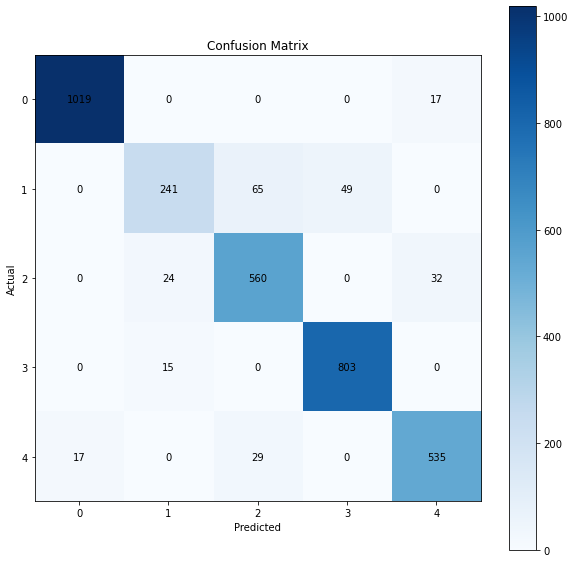

In [93]:
Dt=DecisionTreeClassifier(criterion='entropy',max_depth=100,min_samples_leaf=9,min_samples_split=3).fit(X_train_scaled,y_train)
accu_dt=round(accuracy_score(y_test,Dt.predict(X_test_scaled)),3)
f1_score_dt=round(f1_score(y_test,Dt.predict(X_test_scaled),average='weighted'),3)
Precision_dt=round(precision_score(y_test,Dt.predict(X_test_scaled),average='weighted'),3)
Recall_dt=round(recall_score(y_test,Dt.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',accu_dt)
print('F1_Score:',f1_score_dt)
print('Recall_Score:',Precision_dt)
print('Precision_Score:',Recall_dt)
print('Cross Validation Score:',(np.mean(cross_val_score(Dt, X_train_scaled, y_train, cv = 6))))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=Dt.predict(X_test_scaled))
print(classification)
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(confusion, cmap=plt.cm.Blues)
for i in range(len(confusion)):
    for j in range(len(confusion[i])):
        text = ax.text(j, i, str(confusion[i, j]),
                       ha="center", va="center", color="black")

plt.colorbar(im)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

C:\Users\DELL-PC\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.816
F1_Score: 0.824
Recall_Score: 0.843
Precision_Score: 0.816


C:\Users\DELL-PC\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL-PC\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL-PC\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL-PC\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

Cross Validation Score: 0.810794487140862
                  precision    recall  f1-score   support

Extremely Severe     0.9878    0.8338    0.9043      1161
            Mild     0.4800    0.5136    0.4962       257
        Moderate     0.7205    0.8429    0.7770       624
          Normal     0.9701    0.8616    0.9126       903
          Severe     0.6302    0.8156    0.7110       537

        accuracy                         0.8162      3482
       macro avg     0.7577    0.7735    0.7602      3482
    weighted avg     0.8427    0.8162    0.8237      3482



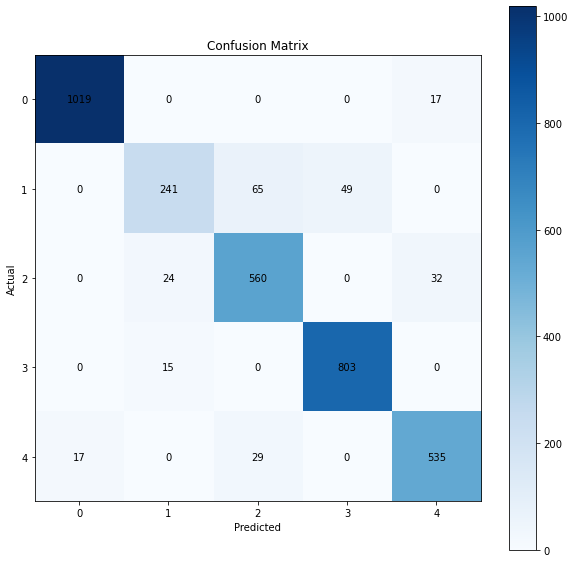

In [94]:
GB=GaussianNB().fit(X_train_scaled,y_train)
accu_gb=round(accuracy_score(y_test,GB.predict(X_test_scaled)),3)
f1_score_gb=round(f1_score(y_test,GB.predict(X_test_scaled),average='weighted'),3)
Precision_gb=round(precision_score(y_test,GB.predict(X_test_scaled),average='weighted'),3)
Recall_gb=round(recall_score(y_test,GB.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',accu_gb)
print('F1_Score:',f1_score_gb)
print('Recall_Score:',Precision_gb)
print('Precision_Score:',Recall_gb)
print('Cross Validation Score:',(np.mean(cross_val_score(GB, X_train_scaled, y_train, cv = 6))))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=GB.predict(X_test_scaled))
print(classification)
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(confusion, cmap=plt.cm.Blues)
for i in range(len(confusion)):
    for j in range(len(confusion[i])):
        text = ax.text(j, i, str(confusion[i, j]),
                       ha="center", va="center", color="black")

plt.colorbar(im)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

C:\Users\DELL-PC\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.791
F1_Score: 0.765
Recall_Score: 0.772
Precision_Score: 0.791


C:\Users\DELL-PC\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\DELL-PC\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\DELL-PC\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\DELL-PC\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y t

Cross Validation Score: 0.7974212169852019
                  precision    recall  f1-score   support

Extremely Severe     0.9512    0.9406    0.9459      1161
            Mild     0.3750    0.0700    0.1180       257
        Moderate     0.6625    0.7580    0.7070       624
          Normal     0.7436    0.9989    0.8526       903
          Severe     0.7521    0.5028    0.6027       537

        accuracy                         0.7912      3482
       macro avg     0.6969    0.6541    0.6452      3482
    weighted avg     0.7724    0.7912    0.7648      3482



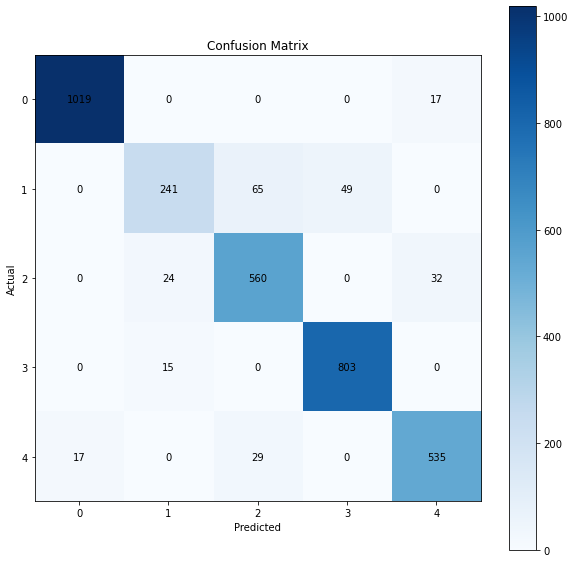

In [95]:
Knnr=KNeighborsClassifier(n_neighbors=19,weights='distance').fit(X_train_scaled,y_train)
accu_knn=round(accuracy_score(y_test,Knnr.predict(X_test_scaled)),3)
f1_score_knn=round(f1_score(y_test,Knnr.predict(X_test_scaled),average='weighted'),3)
Precision_knn=round(precision_score(y_test,Knnr.predict(X_test_scaled),average='weighted'),3)
Recall_knn=round(recall_score(y_test,Knnr.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',accu_knn)
print('F1_Score:',f1_score_knn)
print('Recall_Score:',Precision_knn)
print('Precision_Score:',Recall_knn)
print('Cross Validation Score:',(np.mean(cross_val_score(Knnr, X_train_scaled, y_train, cv = 6))))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=Knnr.predict(X_test_scaled))
print(classification)
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(confusion, cmap=plt.cm.Blues)
for i in range(len(confusion)):
    for j in range(len(confusion[i])):
        text = ax.text(j, i, str(confusion[i, j]),
                       ha="center", va="center", color="black")

plt.colorbar(im)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

C:\Users\DELL-PC\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 1.0
F1_Score: 1.0
Recall_Score: 1.0
Precision_Score: 1.0


C:\Users\DELL-PC\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL-PC\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL-PC\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL-PC\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

Cross Validation Score: 1.0
                  precision    recall  f1-score   support

Extremely Severe     1.0000    1.0000    1.0000      1161
            Mild     1.0000    1.0000    1.0000       257
        Moderate     1.0000    1.0000    1.0000       624
          Normal     1.0000    1.0000    1.0000       903
          Severe     1.0000    1.0000    1.0000       537

        accuracy                         1.0000      3482
       macro avg     1.0000    1.0000    1.0000      3482
    weighted avg     1.0000    1.0000    1.0000      3482



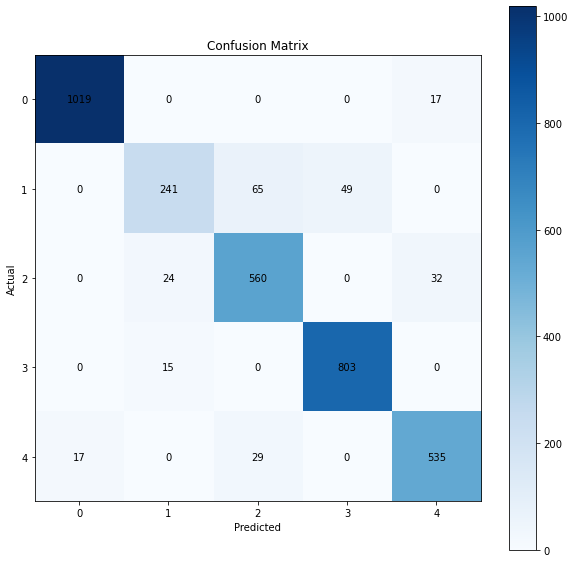

In [96]:
Svmc=SVC(C=10,gamma=0.1,kernel='rbf').fit(X_train_scaled,y_train)
accu_svm=round(accuracy_score(y_test,Svmc.predict(X_test_scaled)),3)
f1_score_svm=round(f1_score(y_test,Svmc.predict(X_test_scaled),average='weighted'),3)
Precision_svm=round(precision_score(y_test,Svmc.predict(X_test_scaled),average='weighted'),3)
Recall_svm=round(recall_score(y_test,Svmc.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',accu_svm)
print('F1_Score:',f1_score_svm)
print('Recall_Score:',Precision_svm)
print('Precision_Score:',Recall_svm)
print('Cross Validation Score:',(np.mean(cross_val_score(Svmc, X_train_scaled, y_train, cv = 6))))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=Svmc.predict(X_test_scaled))
print(classification)
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(confusion, cmap=plt.cm.Blues)
for i in range(len(confusion)):
    for j in range(len(confusion[i])):
        text = ax.text(j, i, str(confusion[i, j]),
                       ha="center", va="center", color="black")

plt.colorbar(im)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [97]:
Result_2={
                  'Model':['Random-Forest','Decision-Tree','GaussianNB','Nearest-Neighbors','SVM'],
                  'Accuracy(%)':[accu_ran*100,accu_dt*100,accu_gb*100,accu_knn*100,accu_svm*100],
                  'F1_Score(%)':[f1_score_ran*100,f1_score_dt*100,f1_score_gb*100,f1_score_knn*100,f1_score_svm*100],
                  'Precision(%)':[Precision_ran*100,Precision_dt*100,Precision_gb*100,Precision_knn*100,Precision_svm*100],
                  'Recall(%)':[Recall_ran*100,Recall_dt*100,Recall_gb*100,Recall_knn*100,Recall_svm*100]
        
                    }
Result_Anxiety=pd.DataFrame(Result_2)

In [98]:
Result_Depression

,Model,Accuracy(%),F1_Score(%),Precision(%),Recall(%)
0,Random-Forest,92.7,92.5,92.6,92.7
1,Decision-Tree,81.6,81.6,81.7,81.6
2,GaussianNB,88.1,88.5,89.7,88.1
3,Nearest-Neighbors,87.2,86.6,87.4,87.2
4,SVM,100.0,100.0,100.0,100.0


In [99]:
Result_Stress

,Model,Accuracy(%),F1_Score(%),Precision(%),Recall(%)
0,Random-Forest,88.7,88.4,88.8,88.7
1,Decision-Tree,74.8,74.8,74.8,74.8
2,GaussianNB,85.8,86.2,87.4,85.8
3,Nearest-Neighbors,85.4,85.1,85.0,85.4
4,SVM,99.6,99.6,99.6,99.6


In [100]:
Result_Anxiety

,Model,Accuracy(%),F1_Score(%),Precision(%),Recall(%)
0,Random-Forest,85.2,82.7,84.0,85.2
1,Decision-Tree,73.4,73.3,73.3,73.4
2,GaussianNB,81.6,82.4,84.3,81.6
3,Nearest-Neighbors,79.1,76.5,77.2,79.1
4,SVM,100.0,100.0,100.0,100.0


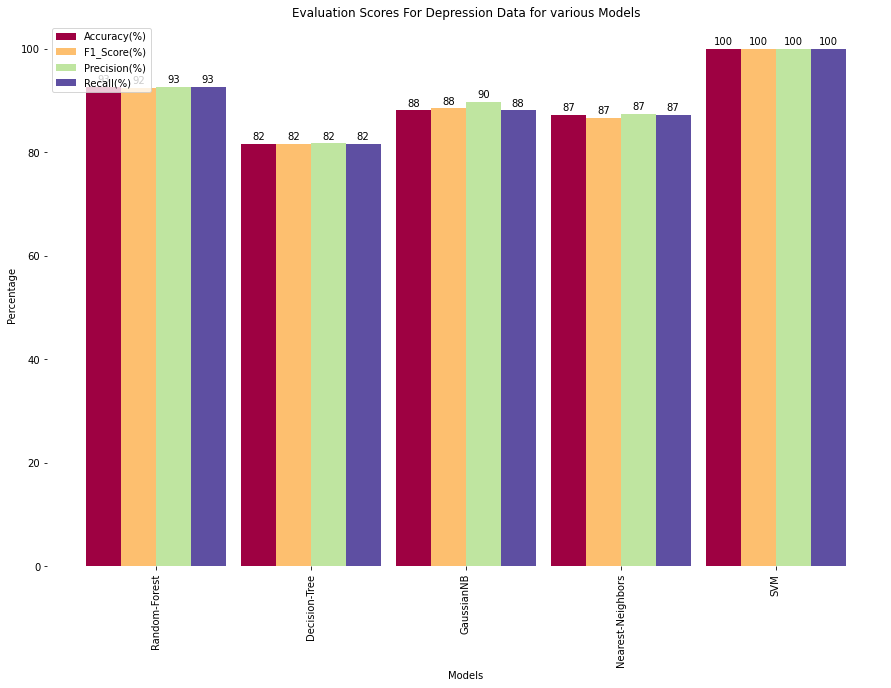

In [101]:
splot=Result_Depression.plot(x='Model',y=['Accuracy(%)','F1_Score(%)','Precision(%)','Recall(%)'],kind='bar',figsize=(15,10),cmap='Spectral',width=0.9)
for p in splot.patches:
    splot.annotate(format(round(p.get_height()), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0,7),
                   textcoords='offset points')
plt.title('Evaluation Scores For Depression Data for various Models')
plt.ylabel('Percentage')
plt.xlabel('Models')
plt.legend(loc='upper left')
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()

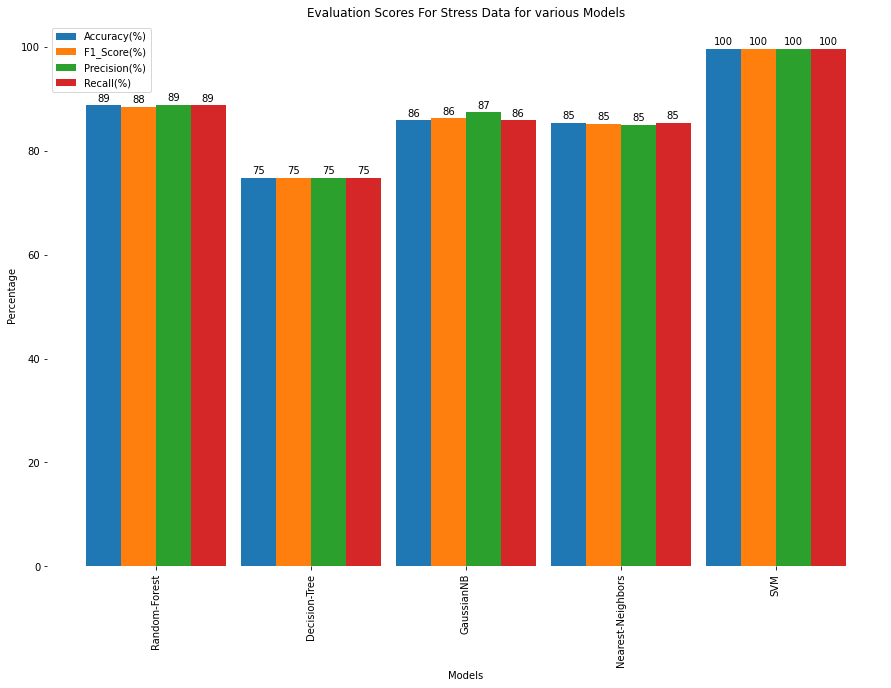

In [102]:
slot=Result_Stress.plot(x='Model',y=['Accuracy(%)','F1_Score(%)','Precision(%)','Recall(%)'],kind='bar',figsize=(15,10),width=0.9)
for p in slot.patches:
    slot.annotate(format(round(p.get_height()), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 7),
                   textcoords='offset points')
plt.title('Evaluation Scores For Stress Data for various Models')
plt.ylabel('Percentage')
plt.xlabel('Models')
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()

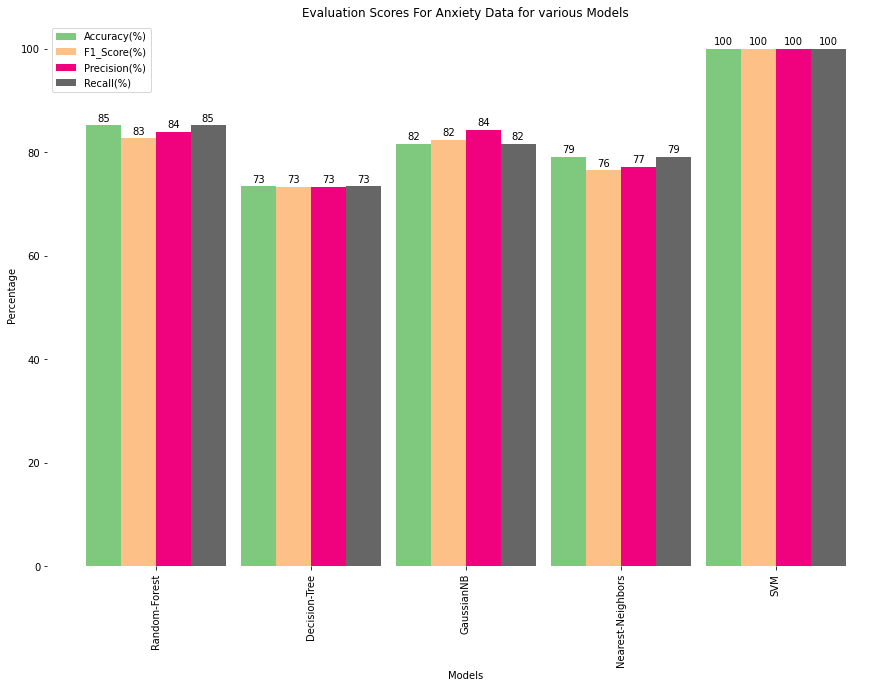

In [103]:
slot=Result_Anxiety.plot(x='Model',y=['Accuracy(%)','F1_Score(%)','Precision(%)','Recall(%)'],kind='bar',figsize=(15,10),cmap='Accent',width=0.9)
for p in slot.patches:
    slot.annotate(format(round(p.get_height()), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 7),
                   textcoords='offset points')
plt.title('Evaluation Scores For Anxiety Data for various Models')
plt.ylabel('Percentage')
plt.xlabel('Models')
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()

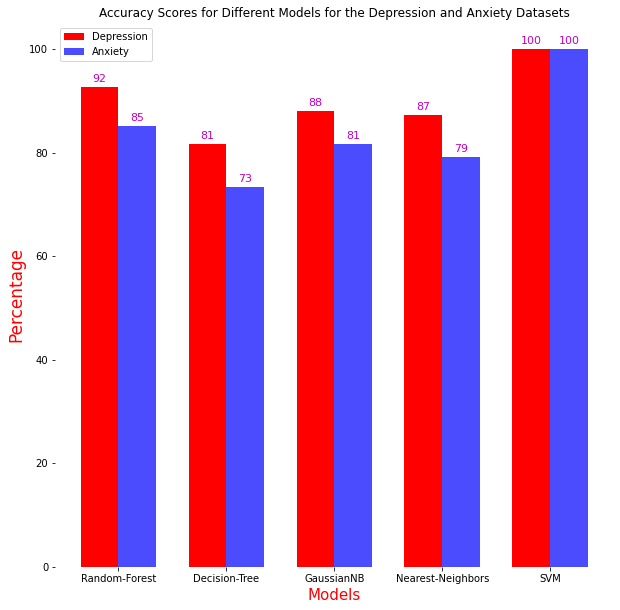

In [104]:
import numpy as np
import matplotlib.pyplot as plt

x = ['Random-Forest', 'Decision-Tree', 'GaussianNB', 'Nearest-Neighbors', 'SVM']
width = 0.35
X = np.arange(len(x))
plt.figure(figsize=(10, 10))

# Define different colors for Depression and Anxiety datasets
depression_color = 'r'
anxiety_color = 'b'

# Plot the accuracy scores for Depression and Anxiety with different colors
bar1 = plt.bar(X, Result_Depression['Accuracy(%)'], width, color=depression_color, label='Depression')
bar2 = plt.bar(X + width, Result_Anxiety['Accuracy(%)'], width, color=anxiety_color, label='Anxiety', alpha=0.7)

# Annotate the bars with the corresponding values
for bar in bar1 + bar2:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, str(int(bar.get_height())),
             ha='center', color='m', fontsize=11)

plt.xticks(X + width / 2, x)
plt.legend(loc='upper left')
plt.title('Accuracy Scores for Different Models for the Depression and Anxiety Datasets')
plt.ylabel('Percentage', fontsize=17, color='red')
plt.xlabel('Models', fontsize=15, color='red')
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()

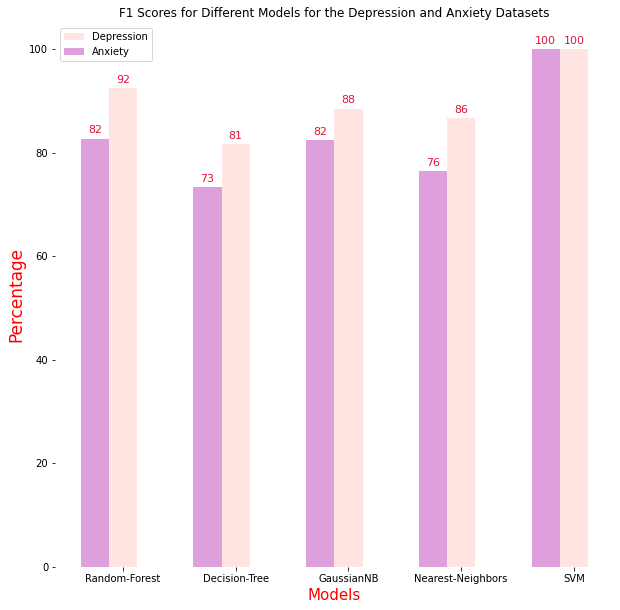

In [105]:
import numpy as np
import matplotlib.pyplot as plt

x = ['Random-Forest', 'Decision-Tree', 'GaussianNB', 'Nearest-Neighbors', 'SVM']
width = 0.25
X = np.arange(len(x))
plt.figure(figsize=(10, 10))

# Define different colors for Depression and Anxiety datasets
depression_color = 'mistyrose'
anxiety_color = 'plum'

# Plot the F1 Score for Depression and Anxiety with different colors
bar1 = plt.bar(X, Result_Depression['F1_Score(%)'], width, color=depression_color, label='Depression')
bar2 = plt.bar(X - width, Result_Anxiety['F1_Score(%)'], width, color=anxiety_color, label='Anxiety')

# Annotate the bars with the corresponding values
for bar in bar1 + bar2:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, str(int(bar.get_height())),
             ha='center', color='crimson', fontsize=11)

plt.xticks(X, x)
plt.legend(loc='upper left')
plt.title('F1 Scores for Different Models for the Depression and Anxiety Datasets')
plt.ylabel('Percentage', fontsize=17, color='red')
plt.xlabel('Models', fontsize=15, color='red')
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()

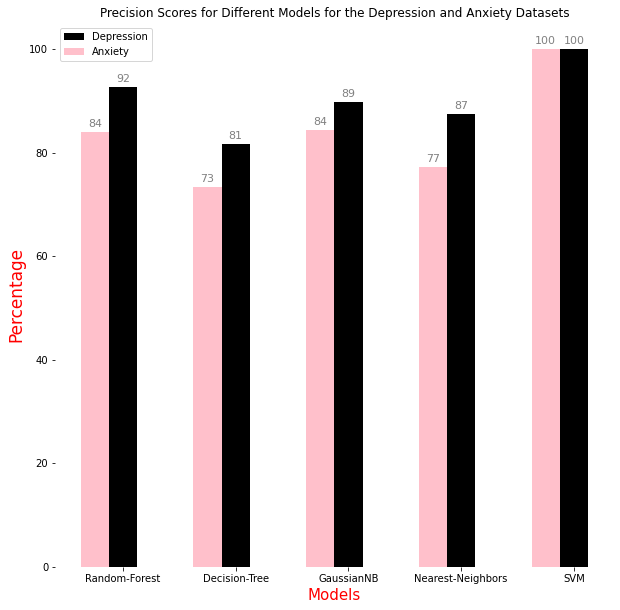

In [106]:
import numpy as np
import matplotlib.pyplot as plt

x = ['Random-Forest', 'Decision-Tree', 'GaussianNB', 'Nearest-Neighbors', 'SVM']
width = 0.25
X = np.arange(len(x))
plt.figure(figsize=(10, 10))

# Define different colors for Depression and Anxiety datasets
depression_color = 'black'
anxiety_color = 'pink'

# Plot the Precision Score for Depression and Anxiety with different colors
bar1 = plt.bar(X, Result_Depression['Precision(%)'], width, color=depression_color, label='Depression')
bar2 = plt.bar(X - width, Result_Anxiety['Precision(%)'], width, color=anxiety_color, label='Anxiety')

# Annotate the bars with the corresponding values
for bar in bar1 + bar2:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, str(int(bar.get_height())),
             ha='center', color='gray', fontsize=11)

plt.xticks(X, x)
plt.legend(loc='upper left')
plt.title('Precision Scores for Different Models for the Depression and Anxiety Datasets')
plt.ylabel('Percentage', fontsize=17, color='red')
plt.xlabel('Models', fontsize=15, color='red')
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()

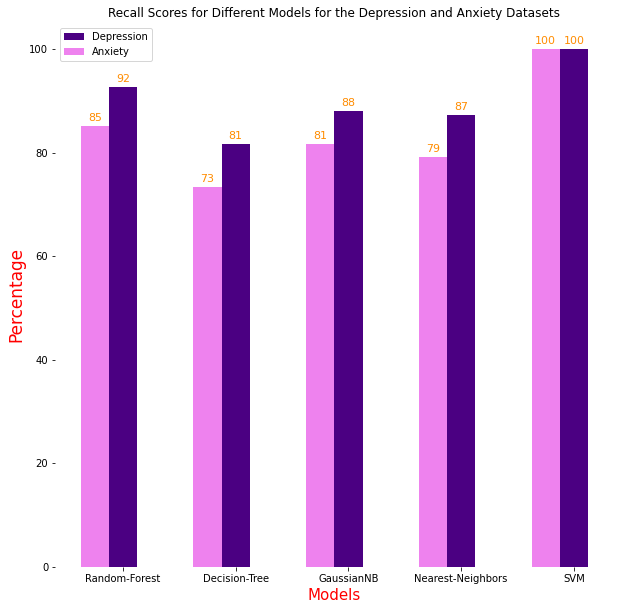

In [107]:
import numpy as np
import matplotlib.pyplot as plt

x = ['Random-Forest', 'Decision-Tree', 'GaussianNB', 'Nearest-Neighbors', 'SVM']
width = 0.25
X = np.arange(len(x))
plt.figure(figsize=(10, 10))

# Define different colors for Depression and Anxiety datasets
depression_color = 'indigo'
anxiety_color = 'violet'

# Plot the Recall Score for Depression and Anxiety with different colors
bar1 = plt.bar(X, Result_Depression['Recall(%)'], width, color=depression_color, label='Depression')
bar2 = plt.bar(X - width, Result_Anxiety['Recall(%)'], width, color=anxiety_color, label='Anxiety')

# Annotate the bars with the corresponding values
for bar in bar1 + bar2:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, str(int(bar.get_height())),
             ha='center', color='darkorange', fontsize=11)

plt.xticks(X, x)
plt.legend(loc='upper left')
plt.title('Recall Scores for Different Models for the Depression and Anxiety Datasets')
plt.ylabel('Percentage', fontsize=17, color='red')
plt.xlabel('Models', fontsize=15, color='red')
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()